## Let's analyze animals from a GitHub repository

First, define functions that read the data

In [6]:
import pandas as pd
import yaml
import glob

# Function to read frontmatter from a Markdown file
def read_frontmatter(markdown_file):
    with open(markdown_file, 'r') as file:
        content = file.read()

    # Split the content into frontmatter and body
    frontmatter, body = content.split('---', 2)[1:]
    return frontmatter

# Function to convert frontmatter (YAML) into a Pandas DataFrame
def yaml_to_dataframe(yaml_str):
    frontmatter_data = yaml.load(yaml_str, Loader=yaml.FullLoader)
    return pd.DataFrame([frontmatter_data])

Read the data into a dataframe

In [7]:
dfs = []

for animal in glob.glob('./animals/*.md'):
    frontmatter_str = read_frontmatter(animal)
    df = yaml_to_dataframe(frontmatter_str)
    dfs.append(df)
    
zoo_df = pd.concat(dfs, ignore_index=True)

In [8]:
zoo_df

,Name,Scientific name,Class,Life Span,Fun Fact
0,Chameleon,Chamaeleonidae,Reptilia,5,"Chameleons have prehensile tails, which act as..."
1,Humpback Whale,Megaptera novaeangliae,Mammalia,45,Humpback whales mainly eat krill
2,Roadrunner,Geococcyx,Aves,7,"Roadrunners are omnivores, and they will even ..."


### Distribution of animal life spans

<AxesSubplot:ylabel='Frequency'>

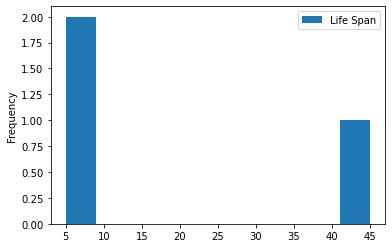

In [9]:
zoo_df.plot(kind='hist')

### Listing all the fun facts

In [10]:
for i, row in zoo_df.iterrows():
    print(f'''Here is a fun fact about the {row['Name']}:''')
    print(f'''"{row['Fun Fact']}"
    ''')

Here is a fun fact about the Chameleon:
"Chameleons have prehensile tails, which act as fifth limbs helping them climb and rest on tree branches"
    
Here is a fun fact about the Humpback Whale:
"Humpback whales mainly eat krill"
    
Here is a fun fact about the Roadrunner:
"Roadrunners are omnivores, and they will even eat venomous snakes."
    
